In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Zoo.csv')
df.rename(columns = {"animal name":"animalname"},inplace =True)

In [3]:
df.head()

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
ani = df["animalname"].value_counts()

In [5]:
df["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
data = df.describe()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   animalname  101 non-null    object
 1   hair        101 non-null    int64 
 2   feathers    101 non-null    int64 
 3   eggs        101 non-null    int64 
 4   milk        101 non-null    int64 
 5   airborne    101 non-null    int64 
 6   aquatic     101 non-null    int64 
 7   predator    101 non-null    int64 
 8   toothed     101 non-null    int64 
 9   backbone    101 non-null    int64 
 10  breathes    101 non-null    int64 
 11  venomous    101 non-null    int64 
 12  fins        101 non-null    int64 
 13  legs        101 non-null    int64 
 14  tail        101 non-null    int64 
 15  domestic    101 non-null    int64 
 16  catsize     101 non-null    int64 
 17  type        101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
df["legs"].var()

4.134653465346538

In [9]:
df["hair"].var()

0.24693069306930682

In [10]:
df["feathers"].var()

0.1603960396039605

In [11]:
df["eggs"].var()

0.24534653465346504

In [12]:
df["milk"].var()

0.2435643564356434

In [13]:
df["airborne"].var()

0.18297029702970313

In [14]:
variance = df.var()

{'boxes': [<matplotlib.lines.Line2D at 0x7fba738ee2d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fba738fa350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fba7395f890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fba738fae10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fba73988e90>,
  <matplotlib.lines.Line2D at 0x7fba738eedd0>]}

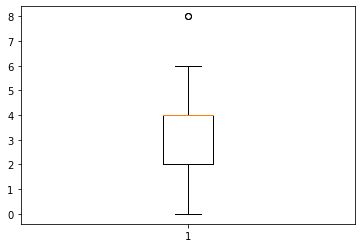

In [15]:
#Plotting Boxplot & Histogram
plt.boxplot(df["legs"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fba73452cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fba7345ad10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fba733e1d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fba733e1810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fba7345a290>,
  <matplotlib.lines.Line2D at 0x7fba7345a7d0>]}

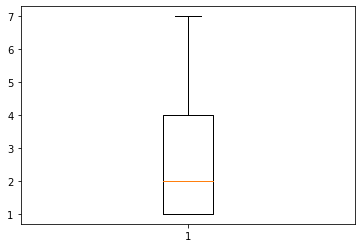

In [16]:
plt.boxplot(df["type"])

(array([23.,  0., 27.,  0.,  0., 38.,  1., 10.,  0.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

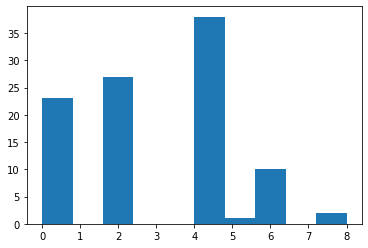

In [17]:
plt.hist(df["legs"])

In [18]:
#Creating dummy variables for the animal variable
dummy = pd.get_dummies(df["animalname"],drop_first =True)

In [19]:
df = pd.concat([df,dummy],axis=1)

In [20]:
df = df.drop(["animalname"],axis=1)


In [21]:
df["legs"].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [22]:
df["legs"],_=pd.factorize(df["legs"])

In [23]:
labels = df.iloc[:,16]

In [24]:
features = df.drop(["type"],axis=1)

In [25]:
#Normalizing equation
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [26]:
data = norm_func(features)

In [27]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2, stratify=labels)

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KN



In [29]:
model1 =KN(n_neighbors = 5)

In [30]:
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
#Accuracy on training data
train_acc = np.mean((model1.predict(x_train)==y_train))

In [48]:
print(train_acc)

0.6


In [39]:
#Accuracy on test data
test_Acc = np.mean(model1.predict(x_test)==y_test)

In [49]:
print(test_acc)

0.5714285714285714


In [40]:
model2 = KN(n_neighbors=7)
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [41]:
#Accuracy ofn training data
train2_acc = np.mean(model2.predict(x_train)==y_train)

In [42]:
print(train2_acc)

0.9625


In [43]:
#Accuracy on test data
test2_acc = np.mean(model2.predict(x_test)==y_test)


In [47]:
print(test2_acc)

0.9047619047619048


In [44]:
#Creating a empty list
acc=[]

In [45]:
#running KNN algorithm for 7 to 50 nearest neighbours and 
# storing the accuracy values 

for i in range(7,50,2):
    model2=KN(n_neighbors = i)
    model2.fit(x_train,y_train)
    train_acc = np.mean(model2.predict(x_train)==y_train)
    test_acc = np.mean(model2.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

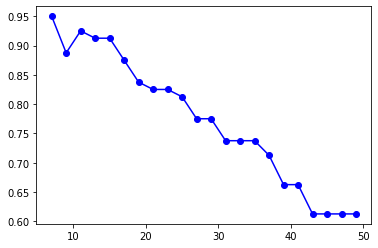

In [ ]:
import matplotlib.pyplot as plt
#training accuracy plot
plt.plot(np.arange(7,50,2),[i[0] for i in acc],"bo-")

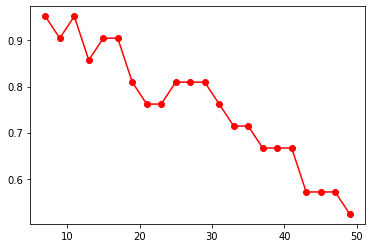

In [ ]:
#test accuracy plot
plt.plot(np.arange(7,50,2),[i[1] for i in acc],"ro-")    

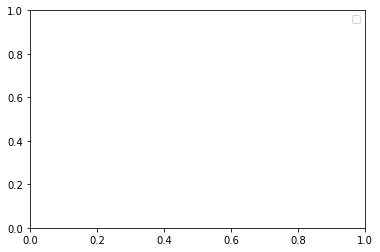

In [ ]:
plt.legend(["train_acc", "test_acc"])

In [52]:
# The plot shows k=17,Trying for k=17
model_fin = KN(n_neighbors = 17) 
model_fin.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [53]:
#Accuracy on training data
train_fin = np.mean(model_fin.predict(x_train)==y_train)

In [54]:
print(train_fin)

0.8625


In [55]:
#Accuracy on test data
test_fin =np.mean(model_fin.predict(x_test)==y_test)

In [56]:
print(test_fin)

0.9047619047619048
